In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive
%cd 'My Drive'
!ls
%cd 'IS projects'


[Errno 2] No such file or directory: 'drive'
/content/drive/My Drive/IS projects/Homework3/DataSet2
[Errno 2] No such file or directory: 'My Drive'
/content/drive/My Drive/IS projects/Homework3/DataSet2
model.png	       Reduced_Train_Data.csv  trainLabels.csv
Reduced_Test_Data.csv  testLabels.csv
[Errno 2] No such file or directory: 'IS projects'
/content/drive/My Drive/IS projects/Homework3/DataSet2


In [ ]:
%cd Homework3/

[Errno 2] No such file or directory: 'Homework3/'
/content/drive/My Drive/IS projects/Homework3/DataSet2


In [ ]:
%cd DataSet2
!ls

[Errno 2] No such file or directory: 'DataSet2'
/content/drive/My Drive/IS projects/Homework3/DataSet2
model.png	       Reduced_Train_Data.csv  trainLabels.csv
Reduced_Test_Data.csv  testLabels.csv


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import to_categorical
import tensorflow as tf
HIDDEN_NEURONS1 = 128
HIDDEN_NEURONS2 = 50
DROPOUT = 0.1
EPOCHS = 20
LABEL_COUNT = 10
SHAPE = 28

#### Read data

In [ ]:
def read_data(filename): return pd.read_csv(filename, index_col = None, header = None).to_numpy()

Rescale data

In [ ]:
def rescale(data): return data / 255.0

In [ ]:
'''
With data given for Question 2
'''
# train_data = read_data('Reduced_Train_Data.csv')
# test_data = read_data('Reduced_Test_Data.csv')
# train_labels = read_data('trainLabels.csv')
# test_labels = read_data('testLabels.csv')



'''
With data downloaded from keras
'''

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data, test_data =  rescale(train_data), rescale(test_data)

#### Build the model with 2 hidden layers and a dropout layer.
#### Used adam optimizer  

In [ ]:
def build_model(activation_function, optimizer_mode, dropout_flag = True, metric = 'accuracy'):
  if dropout_flag : model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(SHAPE, SHAPE)),
                               tf.keras.layers.Dense(HIDDEN_NEURONS1, activation = activation_function),
                               tf.keras.layers.Dropout(DROPOUT), 
                               tf.keras.layers.Dense(HIDDEN_NEURONS2,activation = activation_function), 
                               tf.keras.layers.Dense(LABEL_COUNT)])
  
  else : model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(SHAPE, SHAPE)),
                               tf.keras.layers.Dense(HIDDEN_NEURONS1, activation = activation_function),
                               tf.keras.layers.Dense(HIDDEN_NEURONS2,activation = activation_function), 
                               tf.keras.layers.Dense(LABEL_COUNT)])
  

  model.compile(optimizer = optimizer_mode, loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = [metric])
  history = model.fit(train_data, train_labels, epochs = EPOCHS, validation_data = (test_data, test_labels))
  return model, history

In [ ]:
def evaluate_built_model(model, data, labels): return model.evaluate(data, labels, verbose = 2)

#### Plot the History of model

In [ ]:
def plot_model_history(history):
  plt.plot(history.history['accuracy'],color = 'steelblue' )
  plt.annotate('%' + str(round(history.history['accuracy'][-1],3)), xy=(18, history.history['accuracy'][-1]), xytext=(18, history.history['accuracy'][-1]), color = 'steelblue')
  plt.plot(history.history['val_accuracy'], color = 'pink')
  plt.annotate('%' + str(round(history.history['val_accuracy'][-1],3)), xy=(18, history.history['val_accuracy'][-1]), xytext=(18, history.history['val_accuracy'][-1]), color = 'pink' )
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train accuracy', 'validation accuracy'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'],color = 'lightskyblue' )
  plt.annotate('%' + str(round(history.history['loss'][-1],3)), xy=(18, history.history['loss'][-1]), xytext=(18, history.history['loss'][-1]), color = 'lightskyblue')
  plt.plot(history.history['val_loss'], color = 'lightpink')
  plt.annotate('%' + str(round(history.history['val_loss'][-1],3)), xy=(18, history.history['val_loss'][-1]), xytext=(18, history.history['val_loss'][-1]), color = 'lightpink' )
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train loss', 'validation loss'], loc='upper left')
  plt.show()

In [ ]:
activation_function = 'relu'
optimizer_mode = 'adam'

my_relu_model, relu_history = build_model(activation_function, optimizer_mode)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5150 - accuracy: 0.8134 - val_loss: 0.4221 - val_accuracy: 0.8468
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3853 - accuracy: 0.8589 - val_loss: 0.3806 - val_accuracy: 0.8611
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3515 - accuracy: 0.8702 - val_loss: 0.3574 - val_accuracy: 0.8673
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3302 - accuracy: 0.8780 - val_loss: 0.3667 - val_accuracy: 0.8664
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8841 - val_loss: 0.3684 - val_accuracy: 0.8643
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3014 - accuracy: 0.8878 - val_loss: 0.3622 - val_accuracy: 0.8689
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2906 - accuracy: 0.8914 - val_loss: 0.3432 - val_accuracy:

In [ ]:
train_relu_loss, train_relu_accuracy = evaluate_built_model(my_relu_model, train_data, train_labels)
test_relu_loss, test_relu_accuracy = evaluate_built_model(my_relu_model,test_data, test_labels)

1875/1875 - 2s - loss: 0.1841 - accuracy: 0.9307
313/313 - 0s - loss: 0.3374 - accuracy: 0.8885


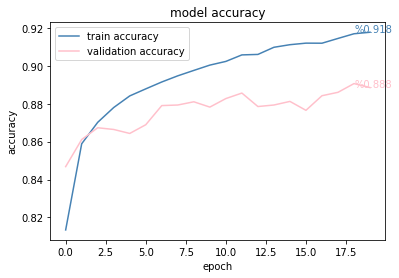

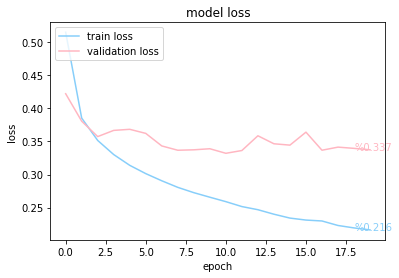

In [ ]:
plot_model_history(relu_history)

In [ ]:
activation_function = 'relu'
optimizer_mode = 'adam'

my_relu_model_no_dropout, relu_history_no_dropout = build_model(activation_function, optimizer_mode, dropout_flag = False)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4978 - accuracy: 0.8214 - val_loss: 0.4351 - val_accuracy: 0.8458
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3710 - accuracy: 0.8633 - val_loss: 0.3828 - val_accuracy: 0.8657
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3356 - accuracy: 0.8763 - val_loss: 0.3745 - val_accuracy: 0.8646
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3130 - accuracy: 0.8839 - val_loss: 0.3550 - val_accuracy: 0.8719
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2954 - accuracy: 0.8894 - val_loss: 0.3601 - val_accuracy: 0.8675
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.8941 - val_loss: 0.3763 - val_accuracy: 0.8615
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.8988 - val_loss: 0.3442 - val_accuracy:

In [ ]:
train_relu_loss_no_dropout, train_relu_accuracy_no_dropout = evaluate_built_model(my_relu_model_no_dropout, train_data, train_labels)
test_relu_loss_no_dropout, test_relu_accuracy_no_dropout = evaluate_built_model(my_relu_model_no_dropout,test_data, test_labels)

1875/1875 - 2s - loss: 0.1792 - accuracy: 0.9320
313/313 - 0s - loss: 0.3691 - accuracy: 0.8908


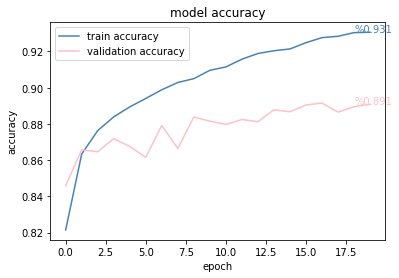

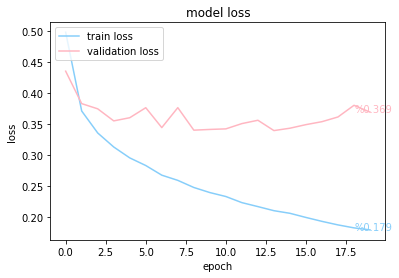

In [ ]:
plot_model_history(relu_history_no_dropout)

In [ ]:
activation_function = 'sigmoid'
optimizer_mode = 'adam'

my_sigmoid_model, sigmoid_history = build_model(activation_function, optimizer_mode)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6511 - accuracy: 0.7877 - val_loss: 0.4563 - val_accuracy: 0.8359
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4073 - accuracy: 0.8537 - val_loss: 0.4259 - val_accuracy: 0.8469
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3695 - accuracy: 0.8666 - val_loss: 0.3979 - val_accuracy: 0.8594
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3458 - accuracy: 0.8742 - val_loss: 0.3800 - val_accuracy: 0.8643
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3296 - accuracy: 0.8796 - val_loss: 0.3644 - val_accuracy: 0.8659
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3155 - accuracy: 0.8846 - val_loss: 0.3648 - val_accuracy: 0.8692
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.8885 - val_loss: 0.3540 - val_accuracy:

In [ ]:
train_sigmoid_loss, train_sigmoid_accuracy = evaluate_built_model(my_sigmoid_model, train_data, train_labels)
test_sigmoid_loss, test_sigmoid_accuracy = evaluate_built_model(my_sigmoid_model,test_data, test_labels)

1875/1875 - 2s - loss: 0.1972 - accuracy: 0.9274
313/313 - 0s - loss: 0.3222 - accuracy: 0.8864


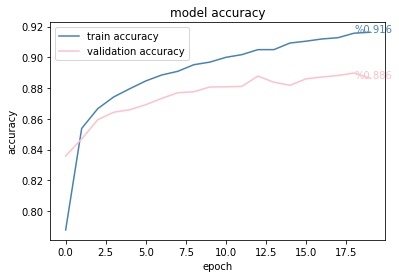

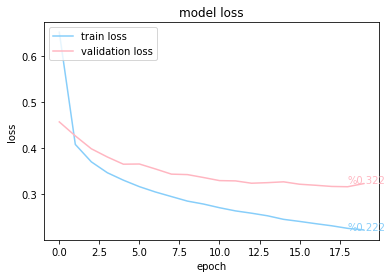

In [ ]:
plot_model_history(sigmoid_history)

In [ ]:
activation_function = 'sigmoid'
optimizer_mode = 'adam'

my_sigmoid_model_no_dropout, sigmoid_history_no_dropout = build_model(activation_function, optimizer_mode, dropout_flag = False)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6252 - accuracy: 0.7925 - val_loss: 0.4442 - val_accuracy: 0.8410
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3915 - accuracy: 0.8583 - val_loss: 0.4163 - val_accuracy: 0.8491
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3506 - accuracy: 0.8723 - val_loss: 0.3807 - val_accuracy: 0.8642
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3276 - accuracy: 0.8819 - val_loss: 0.3581 - val_accuracy: 0.8720
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3090 - accuracy: 0.8872 - val_loss: 0.3557 - val_accuracy: 0.8708
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2946 - accuracy: 0.8930 - val_loss: 0.3481 - val_accuracy: 0.8753
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.8967 - val_loss: 0.3507 - val_accuracy:

In [ ]:
train_sigmoid_loss_no_dropout, train_sigmoid_accuracy_no_dropout = evaluate_built_model(my_sigmoid_model_no_dropout, train_data, train_labels)
test_sigmoid_loss_no_dropout, test_sigmoid_accuracy_no_dropout = evaluate_built_model(my_sigmoid_model_no_dropout,test_data, test_labels)

1875/1875 - 2s - loss: 0.1823 - accuracy: 0.9325
313/313 - 0s - loss: 0.3384 - accuracy: 0.8878


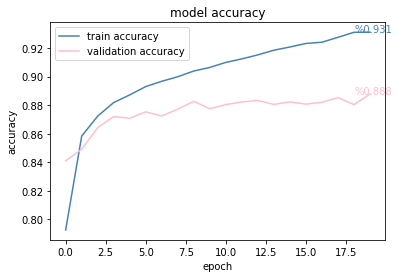

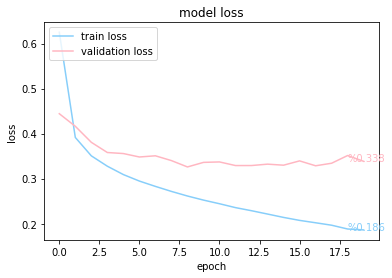

In [ ]:
plot_model_history(sigmoid_history_no_dropout)